In [29]:
import datacube
dc = datacube.Datacube(app='surface_temp')
dataset = dc.load(product='ls8_st',
                  x=(-14.8752, -14.8748), # allows me to only have a limited number of observations, smaller files and more focused on the zone I want to study
                  y=(16.6249, 16.6251),
                  time=('2013-01-01', '2020-12-31'),
                  measurements=['surface_temperature'],
                  output_crs='EPSG:4326',   # Set the CRS, like WGS 84
                  resolution=(-0.0003, 0.0003))  # Adjust resolution as needed


In [30]:
print(dataset)

<xarray.Dataset> Size: 6kB
Dimensions:              (time: 349, latitude: 2, longitude: 2)
Coordinates:
  * time                 (time) datetime64[ns] 3kB 2013-03-26T11:25:47.481168...
  * latitude             (latitude) float64 16B 16.63 16.62
  * longitude            (longitude) float64 16B -14.88 -14.87
    spatial_ref          int32 4B 4326
Data variables:
    surface_temperature  (time, latitude, longitude) uint16 3kB 50861 ... 47968
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref


In [31]:
print("Min:", dataset.surface_temperature.min().values)
print("Max:", dataset.surface_temperature.max().values)


Min: 293
Max: 53161


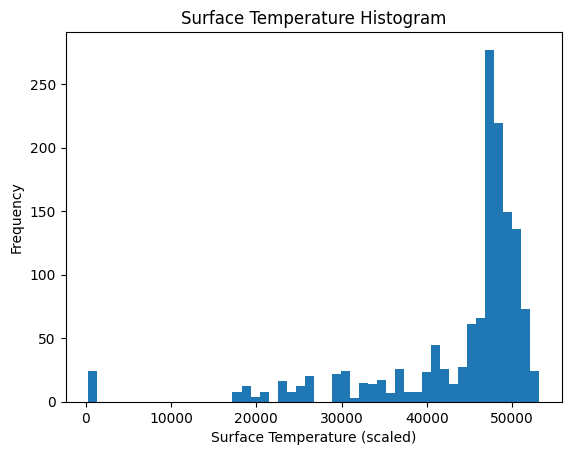

In [32]:
import matplotlib.pyplot as plt

dataset.surface_temperature.plot.hist(bins=50)
plt.title("Surface Temperature Histogram")
plt.xlabel("Surface Temperature (scaled)")
plt.ylabel("Frequency")
plt.show()


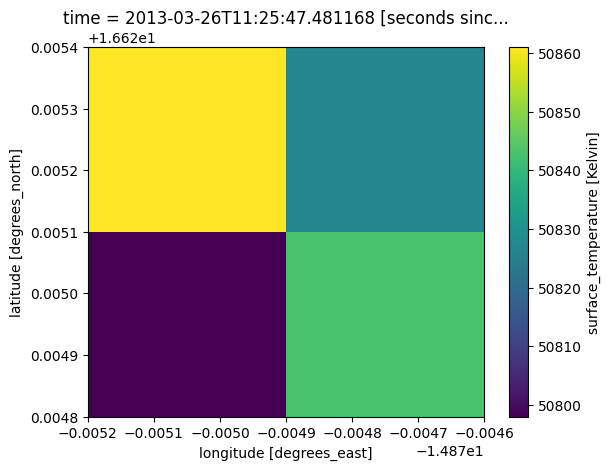

In [33]:
import matplotlib.pyplot as plt
dataset.isel(time=0).surface_temperature.plot(cmap='viridis')
plt.show()


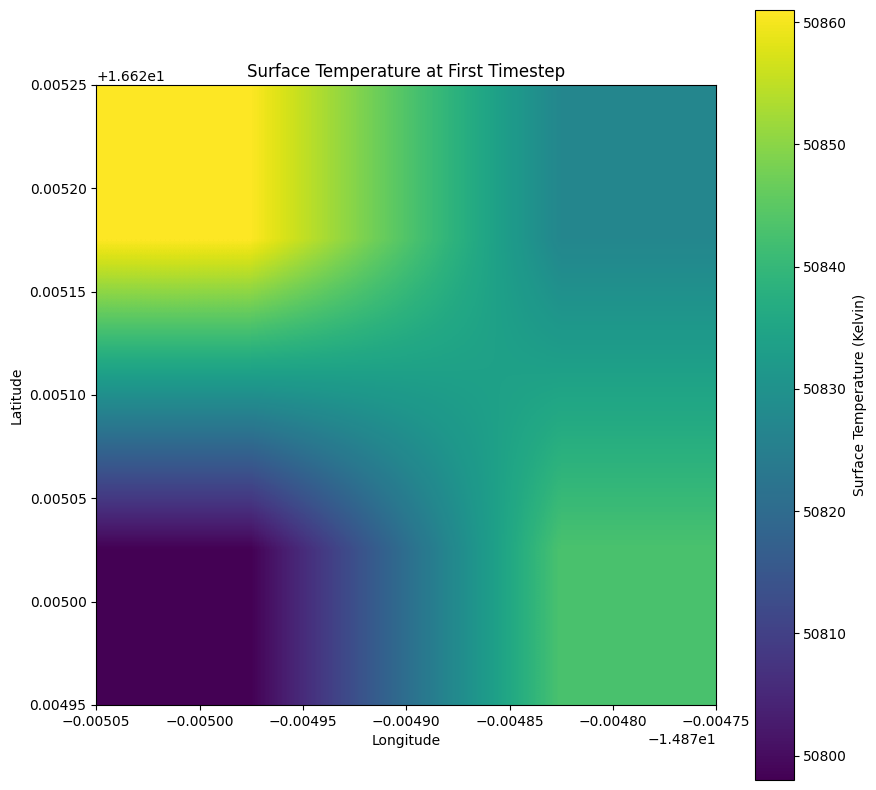

In [34]:
import matplotlib.pyplot as plt

# Extract the data as a 2D array for a single time slice
surface_temp_data = dataset.isel(time=0).surface_temperature.values

# Plot using matplotlib with interpolation
plt.figure(figsize=(10, 10))
plt.imshow(surface_temp_data, cmap='viridis', interpolation='bilinear', 
           extent=[dataset.longitude.min(), dataset.longitude.max(),
                   dataset.latitude.min(), dataset.latitude.max()])
plt.colorbar(label='Surface Temperature (Kelvin)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Surface Temperature at First Timestep")
plt.show()


In [35]:
# Convert dataset to a pandas DataFrame
df = dataset.to_dataframe().reset_index()

# Export to CSV
df.to_csv("Surface_Temperature.csv", index=False)


In [36]:
dataset.to_dataframe().head()


spatial_ref  \
time                       latitude longitude                
2013-03-26 11:25:47.481168 16.62525 -14.87505         4326   
                                    -14.87475         4326   
                           16.62495 -14.87505         4326   
                                    -14.87475         4326   
2013-03-31 11:21:32.880829 16.62525 -14.87505         4326   

                                               surface_temperature  
time                       latitude longitude                       
2013-03-26 11:25:47.481168 16.62525 -14.87505                50861  
                                    -14.87475                50827  
                           16.62495 -14.87505                50798  
                                    -14.87475                50843  
2013-03-31 11:21:32.880829 16.62525 -14.87505                50411

In [37]:
dataset.to_dataframe().to_csv("Surface_Temperature.csv")  # For CSV format

<xarray.Dataset> Size: 4kB
Dimensions:              (time: 94, latitude: 2, longitude: 2)
Coordinates:
  * latitude             (latitude) float64 16B 16.63 16.62
  * longitude            (longitude) float64 16B -14.88 -14.87
    spatial_ref          int32 4B 4326
  * time                 (time) datetime64[ns] 752B 2013-03-31 ... 2020-12-31
Data variables:
    surface_temperature  (time, latitude, longitude) float64 3kB 5.055e+04 .....
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref


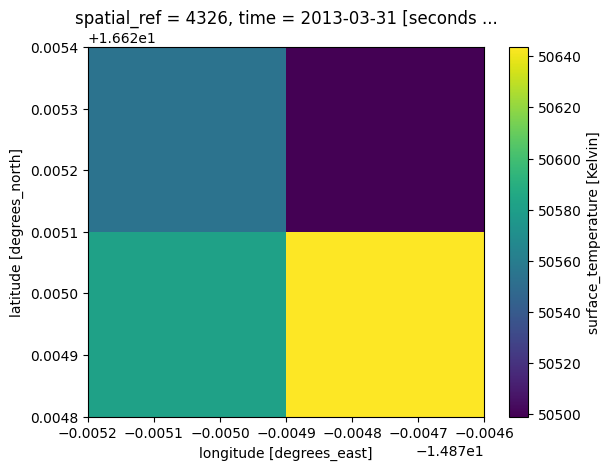

In [38]:
# Resample by month and calculate the mean for each month
monthly_mean = dataset.resample(time="1ME").mean()

# Now you can inspect or export `monthly_mean` for monthly average surface temperature values
print(monthly_mean)

# If you want to plot, for example, the first monthly mean value
monthly_mean.isel(time=0).surface_temperature.plot(cmap='viridis')
plt.show()


In [39]:
# Convert the monthly mean dataset to a DataFrame
monthly_mean_df = monthly_mean.to_dataframe().reset_index()

# Export the DataFrame to CSV
monthly_mean_df.to_csv("monthly_mean_surface_temperature.csv", index=False)


In [37]:
# Apply the formula to convert temperature to Kelvin
dataset['Surface_Temperature'] = dataset['Surface_Temperature'] * 0.00341802 + 149.0 

In [11]:
from deafrica_tools.datahandling import load_ard, mostcommon_crs

ds = load_ard(dc=dc,
               products=['ls8_st'],
               x=(-14.874, -14.876),
               y=(16.624, 16.626),
               time=('2024-01-01', '2024-10-01'),
               measurements = ['surface_temperature'],
               output_crs = 'EPSG:4326',
               resolution = (-0.00025, 0.00025))

print(ds)

Using pixel quality parameters for USGS Collection 2
Finding datasets
    ls8_st
Applying pixel quality/cloud mask
Re-scaling Landsat C2 data
Loading 33 time steps
<xarray.Dataset> Size: 9kB
Dimensions:              (time: 33, latitude: 8, longitude: 8)
Coordinates:
  * time                 (time) datetime64[ns] 264B 2024-01-10T11:20:36.59116...
  * latitude             (latitude) float64 64B 16.63 16.63 ... 16.62 16.62
  * longitude            (longitude) float64 64B -14.88 -14.88 ... -14.87 -14.87
    spatial_ref          int32 4B 4326
Data variables:
    surface_temperature  (time, latitude, longitude) float32 8kB 314.8 ... nan
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref


In [12]:
ds = ds.dropna(dim='time', how='all')
ds['surface_temperature'] = ds.surface_temperature - 273.15

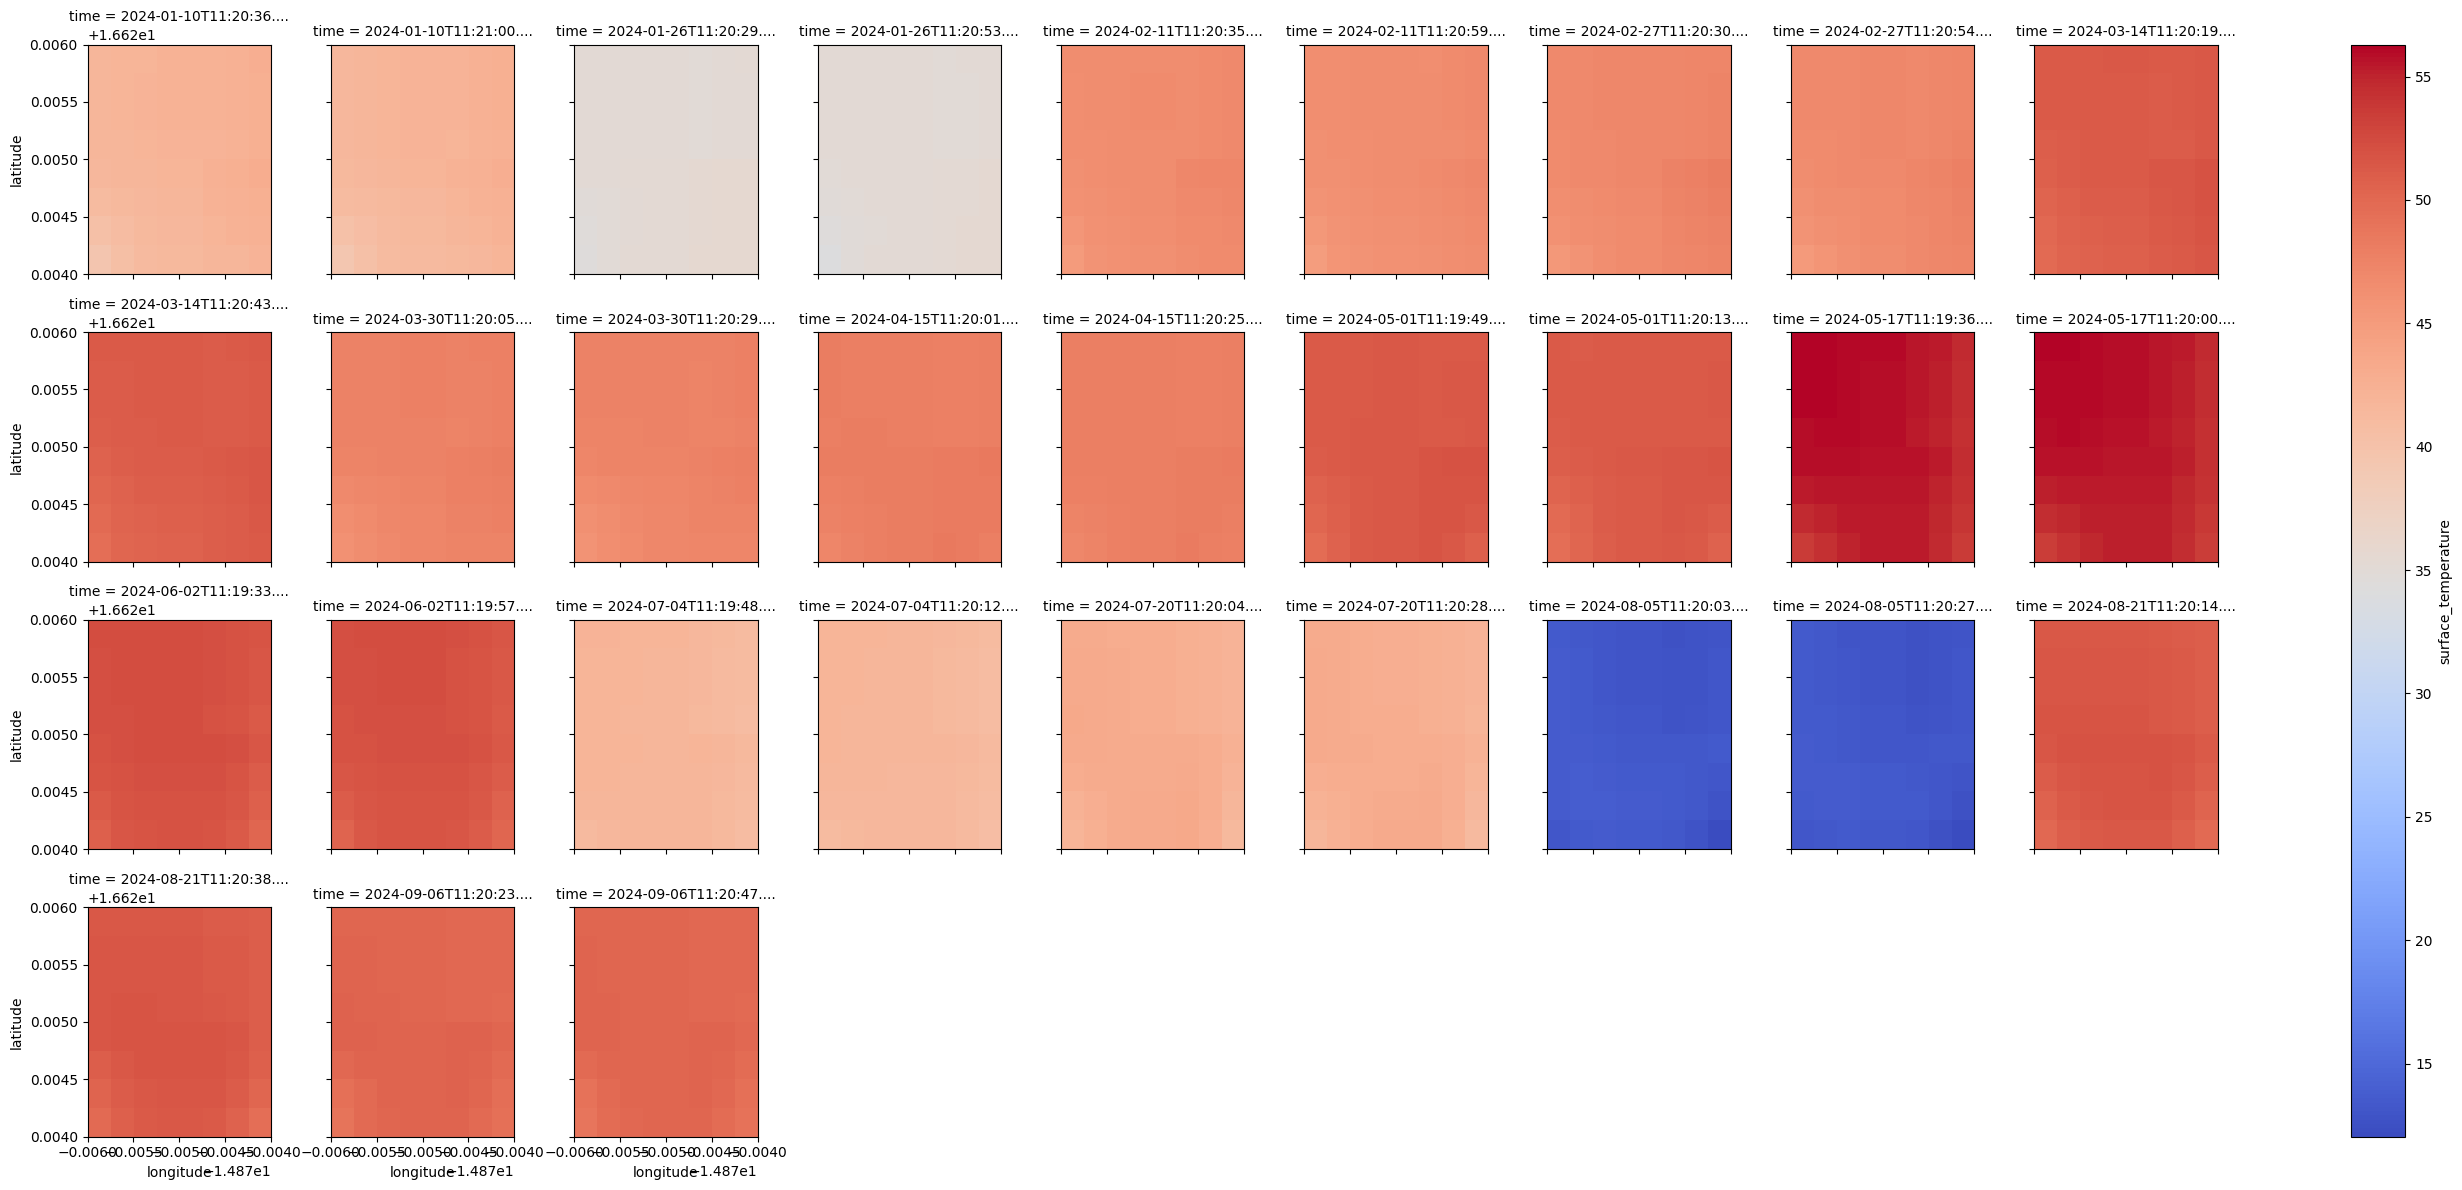

In [13]:
ds.surface_temperature.plot.imshow(col='time', col_wrap=9, cmap='coolwarm');